<a href="https://colab.research.google.com/github/faro7ah/python_project/blob/main/Copy_of_02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read in the dataset from the below link with pandas...

In [1]:
link = "https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv"


2. Show me some of the data...

In [2]:
import pandas as pd
import numpy as np 
df=pd.read_csv(link)

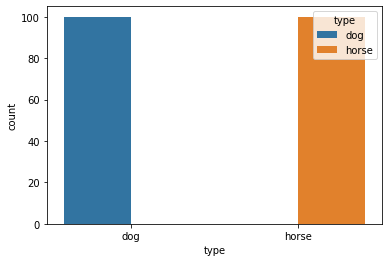

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


x = df['target'] == 1
y = df['target'] == 0
sns.countplot(x='type', data=df ,hue='type');

3. Split the data into training and testing sets ([Help](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [4]:
from sklearn.model_selection import train_test_split

X = df[['height', 'weight']]
y =df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

4. Make and fit a simple logistic regression model... (you shouldn't need to change anything here)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5. Make some predictions...

In [6]:
model.predict(X_test)

array([0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1.])

In [7]:
# save them as variable `preds`
preds = model.predict(X_test)

6. What's the precision of the model? (Hint: Google 'sklearn precision')

In [8]:
from sklearn.metrics import*
precision_score(y_test, preds)

1.0

7. What's the recall of the model?

In [9]:
recall_score(y_test, preds)

0.9393939393939394

8. What's the mean sqared error of the model?

In [10]:
mean_squared_error(y_test, preds)

0.03333333333333333

9. Run 2 different cross validations with different scoring parameters ([Help](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter))

Note: we're doing classification

In [11]:
from sklearn.model_selection import cross_val_score
corr_fal = cross_val_score(model,X, y, scoring="accuracy", cv=10)
corr_fal

array([1.  , 0.9 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.85, 0.85])

In [12]:
cross_val_score(model, X,y, scoring='f1', cv=10)

array([1.        , 0.88888889, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.85714286, 0.86956522])

10. (Bonus) Throw it into a GridSearchCV... (any amount of parameters you want to test out).. of whatever you tested, what are the best parameters?

Note: You can find the possible parameters to adjust in the [LogisticRegression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [13]:
from sklearn.pipeline import make_pipeline
def LR(**kwargs):
  return make_pipeline(LogisticRegression(**kwargs))

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid ={'logisticregression__dual':[True, False],
             'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none']}
grid=GridSearchCV(LR(), param_grid, cv=7)

In [15]:
# fit the grid
grid.fit(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [16]:
# show me the best params
grid.best_params_

{'logisticregression__dual': False, 'logisticregression__penalty': 'l2'}

11. (Bonus Bonus) What's your best r2_score?

In [17]:
r2_score(y_test, preds)

0.8653198653198653